<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 2) Fashion MNIST Classification</b><br>
Write a classifier for the Fashion MNIST dataset. This dataset is available in Keras, and you can load it using the following command: Then, in a notebook, proceed as follows: A. Print the number of classes. B. Display a few images from the dataset. C. Normalize the data and prepare it for training a neural network. D. Train a fully connected (FC) network. Try to maximize the accuracy as much as possible.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)

Number of classes: 10


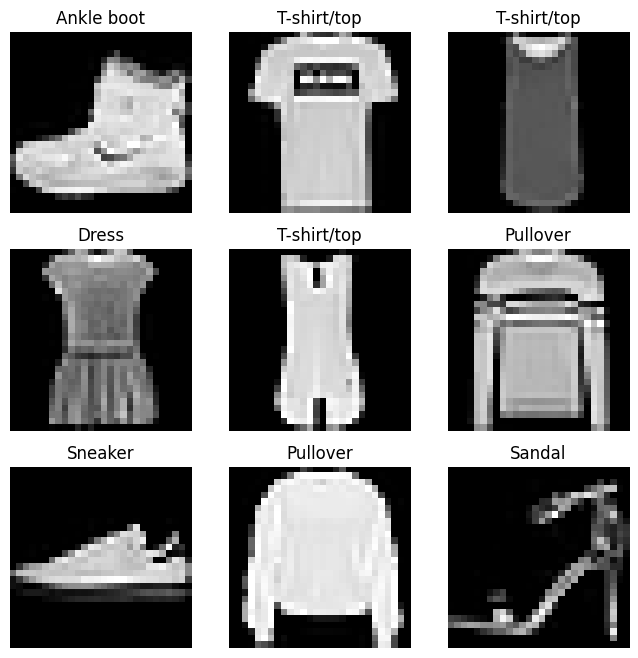

In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
# model = Sequential([
#     Input(shape=(28, 28)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split = 0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6678 - loss: 0.9632 - val_accuracy: 0.8353 - val_loss: 0.4511
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8050 - loss: 0.5457 - val_accuracy: 0.8431 - val_loss: 0.4253
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8219 - loss: 0.4986 - val_accuracy: 0.8503 - val_loss: 0.4115
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8299 - loss: 0.4803 - val_accuracy: 0.8547 - val_loss: 0.4027
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8354 - loss: 0.4638 - val_accuracy: 0.8561 - val_loss: 0.3886
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8382 - loss: 0.4522 - val_accuracy: 0.8613 - val_loss: 0.3837
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8437 - loss: 0.4343 - val_accuracy: 0.8680 - val_loss: 0.3716
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8489 - loss: 0.4247 - val_accu

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8702 - loss: 0.3648
Test accuracy: 0.8658999800682068


In [10]:
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8822 - loss: 0.3465
Test accuracy: 0.8809999823570251
